
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# To ease the loading of modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load BEACS module
from beacs.agents.beacs import BEACS, Configuration

# Load particular Environment Adapter
from example.adapter.MountainCarEnvironmentAdapter import MountainCarEnvironmentAdapter

# Load Metrics
from example.metrics.MountainCarMetrics import _mountaincar_metrics

# Load Plotting Wrappers
from example.metrics.MountainCarPlottingWrapper import \
    parse_metrics_to_df, \
    plot_mountaincar_performance, \
    plot_average_mountaincar_performance

# Load environments
import gym

# Agent - BEACS

## Common parameters

In [2]:
#Environmental Set Up
CLASSIFIER_LENGTH = 2
NUMBER_OF_POSSIBLE_ACTIONS = 3
MOUNTAINCAR = "MountainCar-v0"

#Exploration Set Up
NUMBER_OF_EXPLORE_TRIALS = 1000
METRICS_TRIAL_FREQUENCY_EXPLORE = 1
EPSILON = 1.0
BETA_ALP = 0.05

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS_RL = 1
BETA_EXPLOIT_RL = 0.1

#RL Set Up
GAMMA = 0.99
BETA_RL = 0.1

#GA Set Up
CROSSOVER = 0.
MUTATION = 0.

#BEACS Set Up
DO_ZIP = False
ENABLE_PEP = True
LENGTH_OF_BEHAVIORAL_SEQUENCES = 0

## Environment - MountainCar

In [3]:
# Initialize environment
MountainCar = gym.make(MOUNTAINCAR)
# To update the maximal number of step in a unique episode 
MountainCar._max_episode_steps = 1000
# Reset it, by putting an agent into random position
state = MountainCar.reset()

## Training of BEACS - Exploration

In [4]:
%%time

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    environment_adapter=MountainCarEnvironmentAdapter,
    user_metrics_collector_fcn=_mountaincar_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pep=ENABLE_PEP,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    mu=MUTATION,
    chi=CROSSOVER,
    bs_max=LENGTH_OF_BEHAVIORAL_SEQUENCES
)

agent_explore = BEACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(MountainCar, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 20min 27s, sys: 6.61 s, total: 20min 34s
Wall time: 20min 31s


### Performance

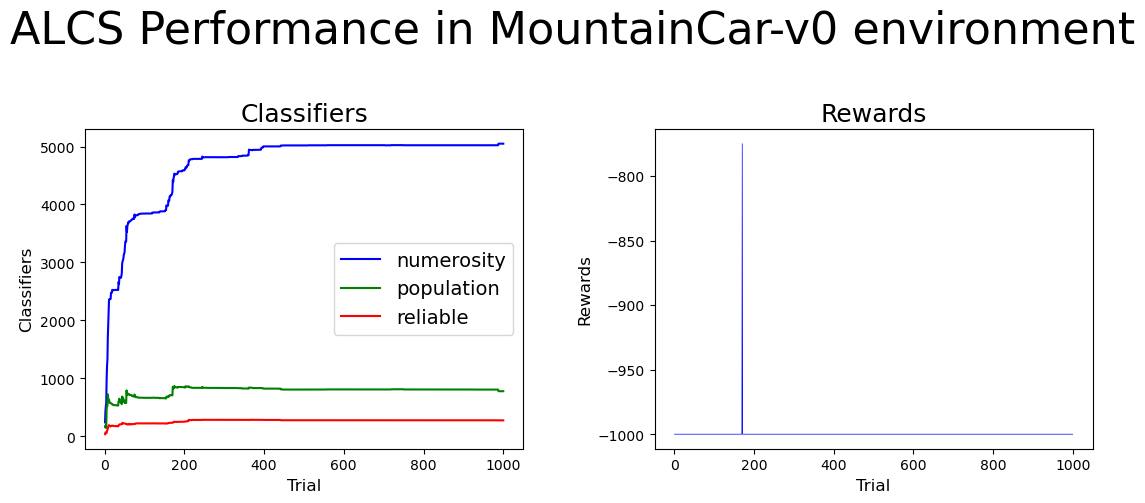

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_mountaincar_performance(agent_explore, MountainCar, metrics_df, cfg_explore, MOUNTAINCAR, metrics_trial_frequency_explore, None)

In [6]:
print(_mountaincar_metrics(population_explore, MountainCar))

if DO_ZIP:
    agent_explore.zip_population()
    population_explore = agent_explore.get_population()

print(_mountaincar_metrics(population_explore, MountainCar))

{'population': 777, 'numerosity': 5049, 'reliable': 274}
{'population': 777, 'numerosity': 5049, 'reliable': 274}


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore]
print(len(population_explore_to_display))
print("\n")
for cl in population_explore_to_display[:]:
    print(cl)
    print("\n")

777


C:10 9 A:0 None E:(9 #:1)
q: 0.5    ra: 0.0    rb: -0.271 ir: -0.271 f: 0.0    err: 0.081 
exp: 1     num: 1 ee: False
Mark: empty Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 170497 tbseq: 170497 talp: 170497 tav: 0.8333 



C:10 13 A:0 None E:(11 #:1)
q: 0.5    ra: 0.0    rb: -0.4095 ir: -0.4095 f: 0.0    err: 0.06561
exp: 1     num: 1 ee: False
Mark: empty Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 170771 tbseq: 170771 talp: 170771 tav: 0.875  



C:10 # A:0 None E:(11 #:1)
q: 0.525  ra: -0.1   rb: -0.3439 ir: -0.4095 f: -0.1   err: 0.0729
exp: 1     num: 1 ee: False
Mark: empty Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 170771 tbseq: 170771 talp: 170771 tav: 0.8    



C:11 13 A:0 None E:(# #:1)
q: 0.475  ra: -0.1   rb: -0.4686 ir: -0.5217 f: -0.1   err: 0.1531
exp: 2     num: 1 ee: False
Mark: 11 13 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 170772 tbseq: 170772 talp: 170773 tav: 0.9583

C:5 12 A:0 None E:(# 11:4139, # #:11827, 6 #:56, 6 11:23)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 4.441e-16
exp: 15962 num: 20 ee: False
Mark: empty Can_be_generalized: [False, False] Aliased_state: 512 PAI_state: 
tga: 996636 tbseq: 11290 talp: 996719 tav: 20.51  



C:6 9 A:1 None E:(5 #:30, # #:478, # 8:112, 5 8:8)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 1.221e-15
exp: 532   num: 20 ee: False
Mark: empty Can_be_generalized: [False, False] Aliased_state: 69 PAI_state: 
tga: 926647 tbseq: 11371 talp: 926647 tav: 2.821e+04 



C:5 11 A:0 None E:(# 10:7469, # #:29656, 6 #:33, 6 10:11)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 4.441e-16
exp: 36860 num: 20 ee: False
Mark: empty Can_be_generalized: [False, False] Aliased_state: 511 PAI_state: 
tga: 999774 tbseq: 13300 talp: 999774 tav: 24.58  



C:5 8 A:1 None E:(# #:592, 4 #:83, # 7:35, # 9:2)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 4.442e-16
exp: 578   num: 20 ee: Fal

In [8]:
agent_explore.get_pai_states_memory()

[]

## Training of BEACS - Exploitation

In [9]:
%%time

cfg_exploit_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    environment_adapter=MountainCarEnvironmentAdapter,
    user_metrics_collector_fcn=_mountaincar_metrics,
    metrics_trial_frequency=1,
    do_pep=ENABLE_PEP,
    beta_alp=BETA_ALP,
    beta_rl=BETA_EXPLOIT_RL,
    gamma=GAMMA,
    epsilon=0.01,
    u_max=CLASSIFIER_LENGTH,
    bs_max=LENGTH_OF_BEHAVIORAL_SEQUENCES
)

agent_exploit_rl = BEACS(cfg_exploit_rl, population_explore)
population_exploit_rl, metrics_exploit_rl = agent_exploit_rl.exploit(MountainCar, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 1.14 s, sys: 13.6 ms, total: 1.15 s
Wall time: 1.14 s


### Performance

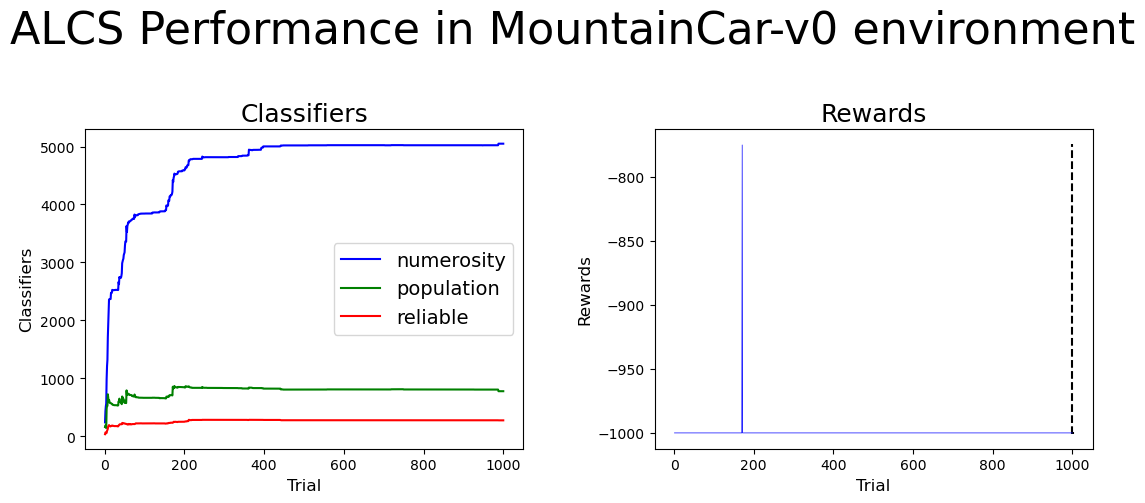

In [10]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, metrics_exploit_rl, metrics_trial_frequency_exploit)
plot_mountaincar_performance(agent_exploit_rl, MountainCar, metrics_df, cfg_exploit_rl, MOUNTAINCAR, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_RL])

In [11]:
trials=[]

avg_step_explore = 0
for trial in metrics_explore:
    trials.append(trial['reward'])
    avg_step_explore += trial['reward']
avg_step_explore /= NUMBER_OF_EXPLORE_TRIALS / metrics_trial_frequency_explore
print("Average number of reward to solve the mountaincar is ",avg_step_explore,
      " for a total of ", NUMBER_OF_EXPLORE_TRIALS, " trials in EXPLORATION")

if NUMBER_OF_EXPLOIT_TRIALS_RL:
    avg_step_exploit_rl = 0
    for trial in metrics_exploit_rl:
        trials.append(trial['reward'])
        avg_step_exploit_rl += trial['reward']
    avg_step_exploit_rl /= NUMBER_OF_EXPLOIT_TRIALS_RL
    print("Average number of steps to solve the mountaincar is ",avg_step_exploit_rl,
          " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL, " trials in EXPLOITATION with Reinforcement Module")

print(_mountaincar_metrics(population_explore, MountainCar))
print(_mountaincar_metrics(population_exploit_rl, MountainCar))

Average number of reward to solve the mountaincar is  -999.775  for a total of  1000  trials in EXPLORATION
Average number of steps to solve the mountaincar is  -1000.0  for a total of  1  trials in EXPLOITATION with Reinforcement Module
{'population': 777, 'numerosity': 5049, 'reliable': 274}
{'population': 777, 'numerosity': 5049, 'reliable': 274}


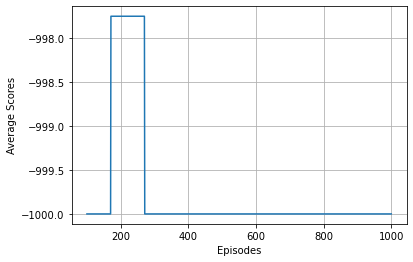

In [12]:
plot_average_mountaincar_performance(trials)

In [13]:
population_exploit_rl.sort(key=lambda cl: -cl.exp)
population_exploit_rl_to_display = [cl for cl in population_exploit_rl 
    if cl.behavioral_sequence or cl.is_enhanced()]
print(len(population_exploit_rl_to_display))
print("\n")
for cl in population_exploit_rl_to_display[:5]:
    print(cl)
    print("\n")

445


C:4 11 A:0 None E:(# #:91419, 5 #:2988, # 10:3592, 5 10:272, # 12:732)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 4.441e-16
exp: 98717 num: 20 ee: False
Mark: empty Can_be_generalized: [False, False] Aliased_state: 411 PAI_state: 
tga: 999681 tbseq: 16586 talp: 999774 tav: 7.276  



C:4 9 A:0 None E:(# 8:2882, # #:91412, 3 #:4624, # 10:283, 3 10:71)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 4.441e-16
exp: 89533 num: 20 ee: False
Mark: empty Can_be_generalized: [False, False] Aliased_state: 49 PAI_state: 
tga: 999711 tbseq: 122029 talp: 999726 tav: 7.634  



C:3 10 A:0 None E:(# #:74840, # 11:8403, 4 #:335, 2 #:200, 4 11:90)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0   f: -1.0   err: 4.441e-16
exp: 81647 num: 20 ee: False
Mark: empty Can_be_generalized: [False, False] Aliased_state: 310 PAI_state: 
tga: 999739 tbseq: 90662 talp: 999747 tav: 7.565  



C:3 9 A:0 None E:(# #:67729, # 10:8267, 2 #:1669, 2 10:214)
q: 1.0    ra: -1.0   rb: -1.0   ir: -1.0